# Vehicle Theft Highest At Night in San Francisco and Seattle

This notebook shows that vehicle theft crimes show two consistent patterns in both San Francisco and Seattle:
- vehicle theft was the highest during the night hours (6pm to 10pm in SF and 8pm to 10pm in Seattle)
- vehicle theft when up immediately at the start of summer, peaked, then dropped off at the end of summer presumably returning to "normal" levels.

This notebook uses datasets of crime incidents in both San Francisco and Seattle from 06/01/2014 - 08/31/2014.
This is a [Jupyter](http://jupyter.org/) Notebook using the R programming language.

After analyzing all the different types of crime (e.g. assault, kidnapping, burglary, etc.) it was clear that vehicle theft was most consistent. It was highest during a small time period at night from 6pm to 10pm in San Francisco and a similar time in Seattle. Likewise, it was consistent across all districts in SF. There was also a natural curve of vehicle theft over time for the summer months in both cities.

## Data Summary

*San Francisco*

* 1,966 vehicle thefts reported in the summer of 2014
* Automobile theft accounted for vast major of vehicle theft (1,350 or 69%)
* Most number of vehicle theft was in the Ingleside district (19%) and second most in Mission district (16%)
* Highest vehicle theft at night between 6pm and 10pm

*Seattle*

* 3,057 vehicle thefts reported in the summer of 2014
* Automobile theft accounted for vast major of vehicle theft (2,588 or 85%)
* Most number of vehicle thefts reported in district J (349 or 11%)
* Highest vehicle theft at night between 8pm and 10pm

In [2]:
#############################################
# load pre-filtered vehicle theft only subset
d1 <- read.csv("sanfrancisco_vehicle_theft_2014.csv", header = TRUE, stringsAsFactors=F)

# If we loaded full data from 2014 then would need to create filtered subset from it
# d1 <- read.csv("sanfrancisco_incidents_summer_2014.csv", header = TRUE, stringsAsFactors=F)
# d1 <- subset(d1, Category == "VEHICLE THEFT", select = c(DayOfWeek,Date,Hour,Time,Descript,PdDistrict))
# but this analysis is just using the vehicle theft subset

# setup data fields and derive new fields as needed
d1$Hour <- as.numeric(substr(d1$Time,1,2))

# re-order days of the week in right order
d1$DayOfWeek <- ordered(d1$DayOfWeek, levels = c("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"))
d1$when <- as.POSIXct(strptime(d1$Date, "%m/%d/%Y", tz = "PST8PDT"))

## Vehicle theft by the hour of the day

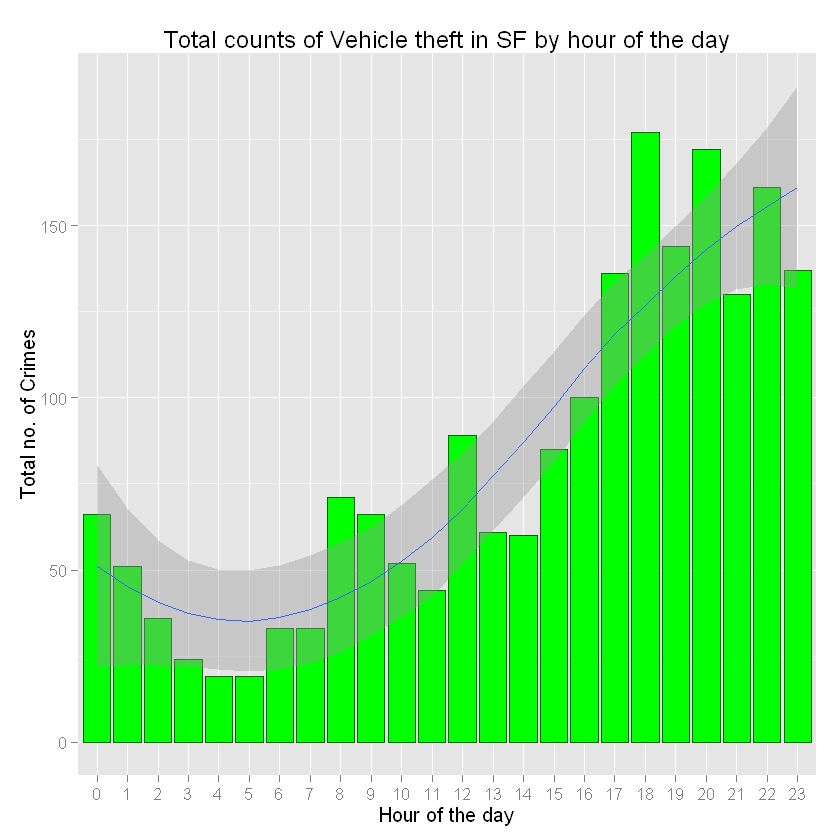

In [3]:
###########################################################
# Plot number of vehicle theft in SF by the hour of the day
###########################################################

byhour_sf <- as.data.frame(table(d1$Hour))

library(ggplot2)

g <- ggplot(data=byhour_sf, aes(Var1,Freq)) + 
 geom_bar(stat="identity", fill="green", colour="darkgreen") +
 ggtitle("Total counts of Vehicle theft in SF by hour of the day") +
 xlab("Hour of the day")+ ylab("Total no. of Crimes") 

g + stat_smooth(method="loess", span = 0.9, aes(group = 1))

The plot above (as one would expect) shows an upward increase in the number of vehicle thefts drastically go up at night in San Francisco, specifically between 6pm and 10pm.

Next, compare this with vehicle thefts in Seattle.

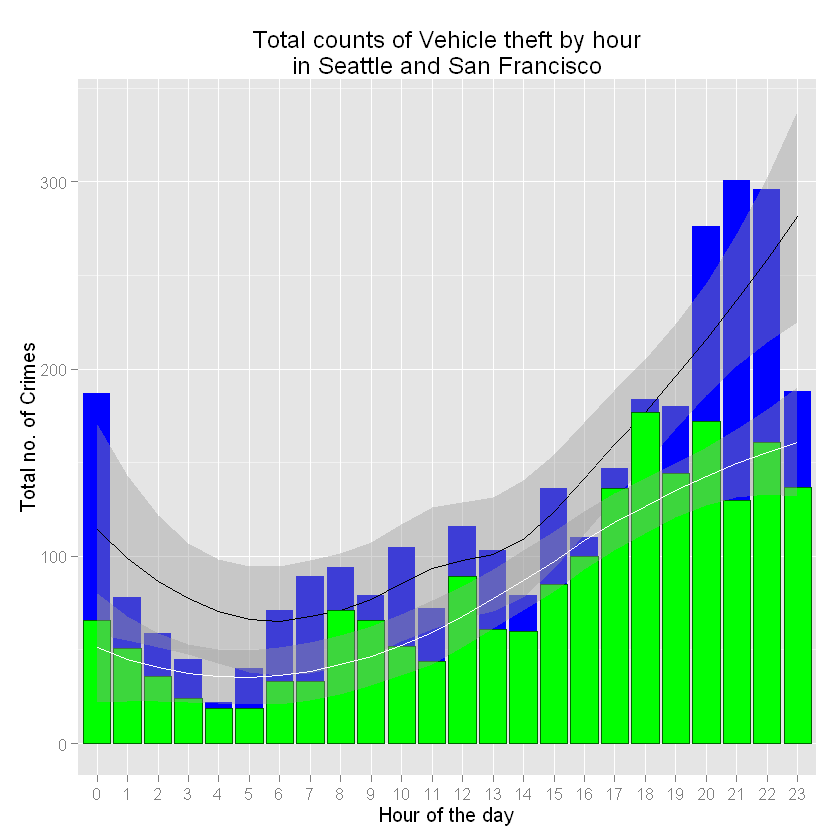

In [4]:
############################################################
# Load Seattle data (pre-filtered vehicle theft only subset)
############################################################

d2 <- read.csv("seattle_vehicle_theft_2014.csv", header = TRUE, stringsAsFactors=F)
library(lubridate)
d2$when <- as.POSIXct(strptime(d2$Occurred.Date.or.Date.Range.Start, "%m/%d/%Y %I:%M:%S %p", tz = "PST8PDT"))
d2$Hour <- hour(d2$when)
# generate frequency counts by the hour
byhour <- as.data.frame(table(d2$Hour))

######################################################
# Plot crime numbers by hour of the day in both cities
######################################################

# First plot Seattle data in blue
g <- ggplot(data=byhour, aes(Var1,Freq)) + geom_bar(stat="identity", fill="blue") +
  ggtitle("Total counts of Vehicle theft by hour\nin Seattle and San Francisco") +
  xlab("Hour of the day") + ylab("Total no. of Crimes") +
  stat_smooth(method="loess", span = 0.9, aes(group = 1), color="black")

# then overlay San Francisco data on plot in green
g + geom_bar(data=byhour_sf, stat="identity", fill="green", colour="darkgreen") +
  stat_smooth(data=byhour_sf, method="loess", span = 0.9, aes(group = 1), color="white")

In plot above, the number of vehicle thefts go up at night in San Francisco between 6pm and 10pm (shown in green) and even more drastically in Seattle from 8pm to 10pm (shown in blue).

## Vehicle Theft Sub-categories

In [5]:
######################################################
# Show sub-category of vehicle thefts in San Francisco
######################################################

table(d1$Descript)


    ATTEMPTED STOLEN VEHICLE STOLEN AND RECOVERED VEHICLE 
                          13                          102 
           STOLEN AUTOMOBILE                   STOLEN BUS 
                        1350                            1 
STOLEN MISCELLANEOUS VEHICLE            STOLEN MOTORCYCLE 
                           2                          148 
                STOLEN TRUCK 
                         350 

In [6]:
################################################
# Show sub-category of vehicle thefts in Seattle
################################################

table(d2$Offense.Type)


               THEFT-BOAT VEH-RCVD-FOR OTHER AGENCY            VEH-THEFT-AUTO 
                       16                       170                      2588 
       VEH-THEFT-MTRCYCLE          VEH-THEFT-OTHVEH         VEH-THEFT-TRAILER 
                      135                         2                        23 
          VEH-THEFT-TRUCK 
                      123 

Clearly Seattle has more numbers of reported vehicle crime (total 3,057) than San Francisco (total 1,966) even though **San Francisco has a larger population** ~852K people in the city with a density of 18,187 people/sq mile whereas Seattle has ~610K people in the city with a density of 7,969 people/sq mile. Does that mean Seattle has more vehicle crimes than San Francisco or is Seattle just better (or more complete) at reporting its crimes?

In tables above the largest occurrence and most common of vehicle theft in both cites is the automobile.
85% Seattle / 69% San Francisco

## Vehicle Theft in SF by District

In [7]:
# Show total # of vehicle thefts in SF by district

t <- table(d1$PdDistrict) 
t <- t[order(t, decreasing = TRUE)]
df <- data.frame(t)
df$Perc <- df$t / sum(df$t) * 100
colnames(df) <- c('Count','Percent')
df

,Count,Percent
INGLESIDE,382,19.43032
MISSION,306,15.5646
BAYVIEW,245,12.46185
TARAVAL,222,11.29196
NORTHERN,202,10.27467
SOUTHERN,161,8.189217
PARK,150,7.629705
CENTRAL,146,7.426246
RICHMOND,118,6.002035
TENDERLOIN,34,1.7294


Most number of vehicle theft shown in table above is in the **Ingleside** district and second most in **Mission** district. Mission district is at the heart of the city center and as expected it has a high volume of theft.

In 2011 it was reported that the Tenderloin area had the highest crime rate in San Francisco but in summer of 2014 it had the lowest numbers of vehicle theft (<2%). The table above is actually misleading. If you plot the data on a map overlaid with a heatmap then it will show the highest concentration at Tenderloin and spreading out south towards Mission. The neighboring districts surrounding Tenderloin are adding to the concentration of crime at the center of the city for a more complete total picture.

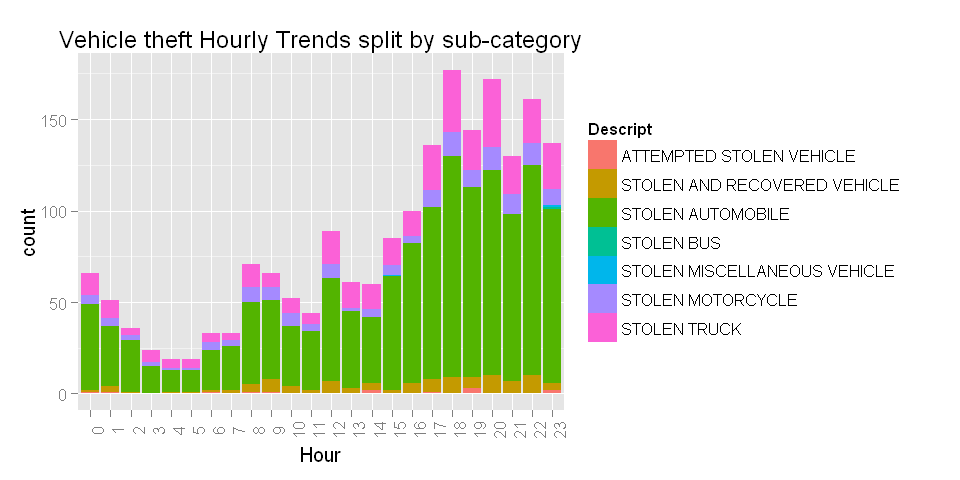

In [32]:
########################################################
# Plot of vehicle theft by hour colored by description
########################################################

#options(repr.plot.width=8, repr.plot.height=4)
ggplot(d1, aes(x=factor(Hour), fill=Descript)) + geom_histogram() +
 theme(axis.text.x = element_text(angle=90, vjust=1)) +
  xlab("Hour") + ggtitle("Vehicle theft Hourly Trends split by sub-category")      
 


The pattern of vehicle theft as seen in the histogram shows the increased crime highest from 6pm to 10pm especially with the  STOLEN AUTOMOBILE sub-category (shown in green above) which is the most common type of vehicle theft.

The stolen motorcycle, bus and truck are much less common so it does not have the numbers to show a consistent pattern. The non-auto theft incidents are basically low-level noise in the data.

## Vehicle Theft by date

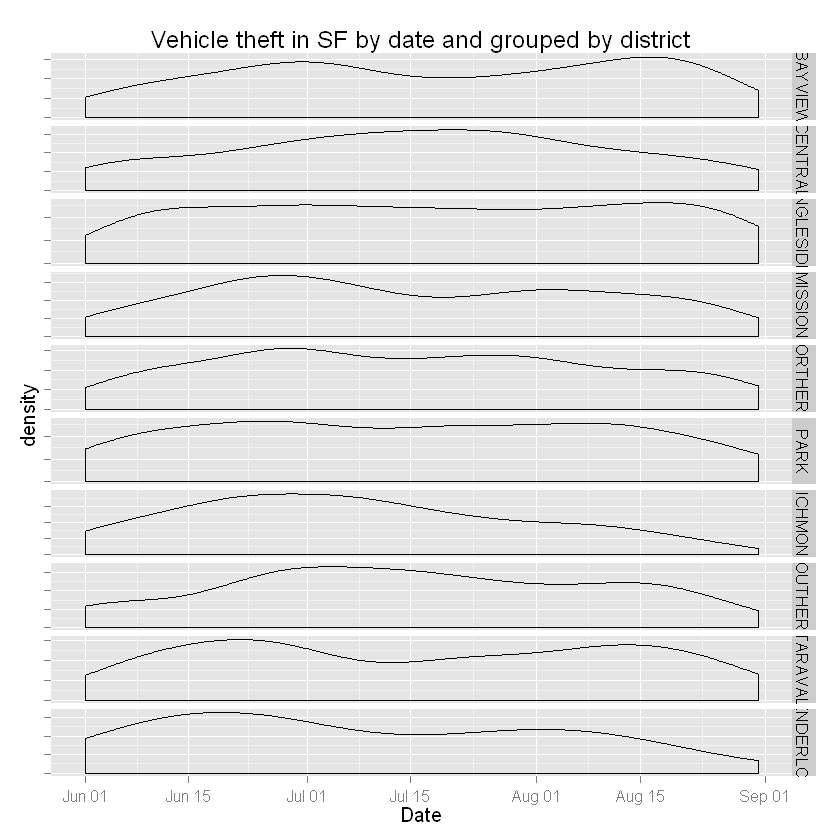

In [16]:
########################################################################
# Show overall vehicle crime over entire time period grouped by district
########################################################################

ggplot(d1, aes(when)) + geom_density() +
  ggtitle("Vehicle theft in SF by date and grouped by district") +
  facet_grid(PdDistrict ~., scales="free_y") +
  theme(axis.text.y = element_blank()) + xlab("Date")

Each of the districts has a lower number of vehicle thefts at the start of the summer period, increases to peak then drops off at the end of summer. 

Analyzing the larger multi-year dataset would confirm if this pattern repeats itself in different years as well as how it compares to the rest of the year. For the year 2014, it was confirmed that July is the peak for vehicle theft. Further analysis would be needed to check for this pattern across multiple years.

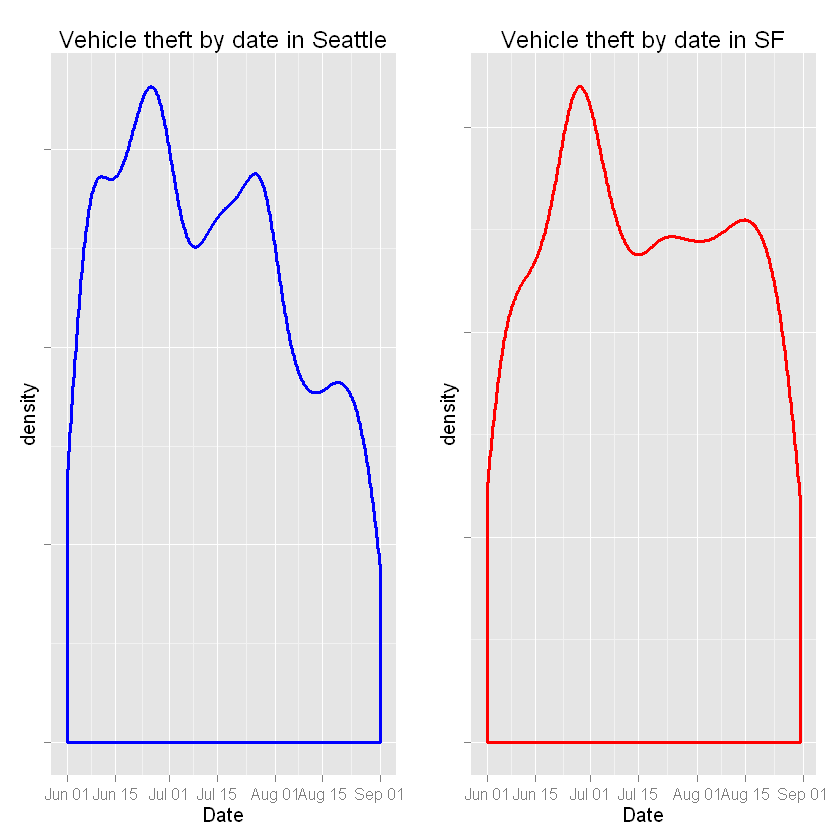

In [17]:
##############################################################
# Plot number of vehicle theft crimes over time in both cities
##############################################################

library(gridExtra)

p1 <- ggplot(d2, aes(when)) +
  theme(axis.text.y = element_blank()) +
  ggtitle("Vehicle theft by date in Seattle") + xlab("Date") +
  geom_density(color="blue", size=1)

p2 <- ggplot(d1, aes(when)) +
  theme(axis.text.y = element_blank()) +
  ggtitle("Vehicle theft by date in SF") + xlab("Date") +
  geom_density(color="red", size=1)
   
# arrange plots side-by-side on a single row
grid.arrange(p1, p2, nrow=1)

In plots above, both Seattle (on left in blue) and San Francisco (on right in red) have a rapid rise in vehicle thefts at the beginning of summer followed by a drop-off at the end.

**The pattern of vehicle theft is consistent in both cities**.

There is a much higher amount of vehicle theft at night as one would expect and there is a rise of vehicle at the start of summer which drops off at the end of summer.

## SUMMARY

The data clearly shows the following findings:
* vehicle theft was the highest during the night hours (6pm to 10pm in San Francisco and 8pm to 10pm in Seattle).
* vehicle theft when up immediately at the start of summer, peaked, then dropped off at the end of summer presumably returning to "normal" levels.